In [12]:
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.optimizers import Adam 

In [13]:
x,y = make_moons(100,noise = 0.25,random_state = 2)

In [14]:
x

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

In [15]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

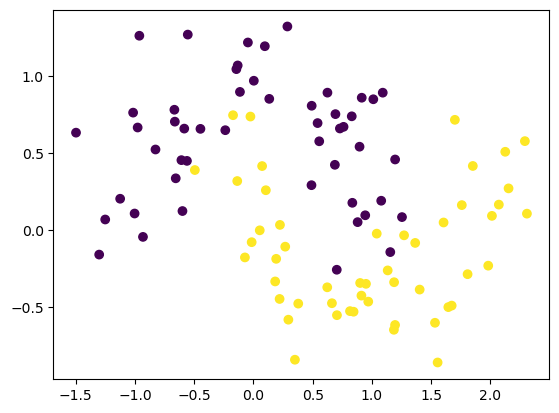

In [16]:
plt.scatter(x[:,0],x[:,1],c = y)
plt.show()

In [17]:
model1 = Sequential()

model1.add(Dense(128,input_dim = 2, activation = "relu"))
model1.add(Dense(128,activation = "relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
adam = Adam(learning_rate=0.01)
model1.compile(loss = "binary_crossentropy",optimizer = adam,metrics = ['accuracy'])
history1  = model1.fit(x,y,epochs = 2000,validation_split = 0.2,verbose = 0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 692us/step


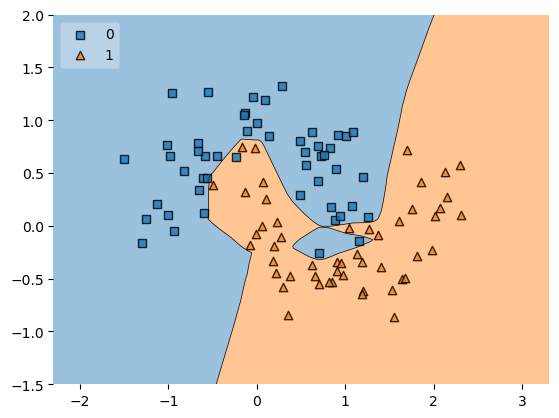

In [19]:
plot_decision_regions(x,y.astype('int'),clf = model1 ,legend  = 2)
plt.xlim(-2.3)
plt.ylim(-1.5,2) # here it shows the overfitting   
plt.show()

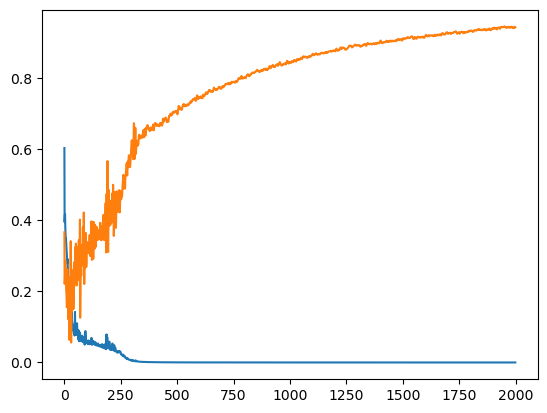

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.show() # here in our data it shows the overfitting 

In [31]:
# here another model in the given 
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(x,y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 689us/step


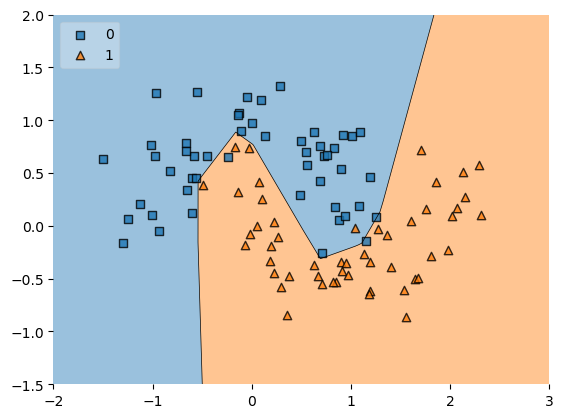

In [35]:
plot_decision_regions(x, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

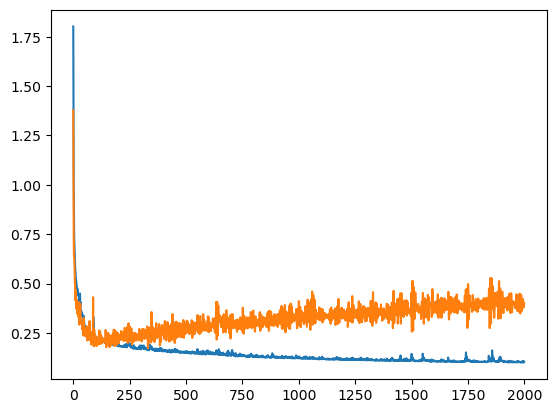

In [37]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.show()

In [40]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

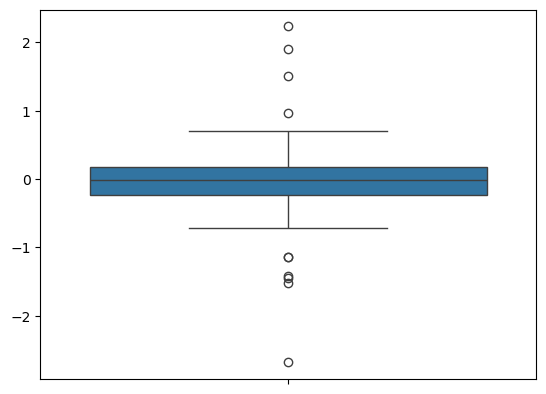

In [41]:
sns.boxplot(model1_weight_layer1)

<Axes: >

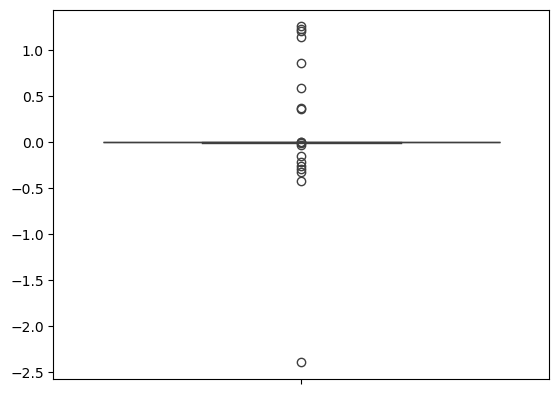

In [42]:
sns.boxplot(model2_weight_layer1 )

In [43]:
model1_weight_layer1.min()

-2.6794996

In [44]:
model2_weight_layer1.min()

-2.3951976

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14284\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14284\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

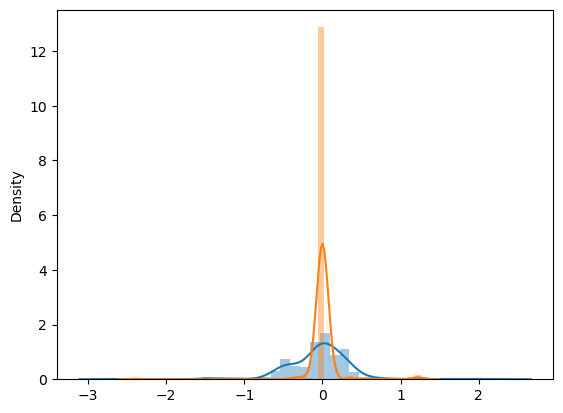

In [45]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)